In [251]:
# matplotlib
# mpl_toolkits.mplot3d
# synthetic data

import numpy as np

A = np.random.standard_normal((3, 2))
print(A)

# rank of the matrix
print(np.linalg.matrix_rank(A))


[[ 0.24216283 -0.0272349 ]
 [-1.14292037  0.78783191]
 [-0.05897022 -1.2775428 ]]
2


# Generation of Dataset #1

In [253]:
# Generation of Dataset #1
# x = Av
# initialize an empty data matrix

Xold = np.empty([1])
Xold = np.matmul(A,np.random.standard_normal((2, 1)))

#generate v method 1
for i in range(2,501):
    v = np.random.standard_normal((2, 1))
    x = np.matmul(A,v)
    Xold = np.append(Xold,x,axis = 1)
    
#generate v method 2
vnew = np.random.normal(0,1,(2,500))
X = np.matmul(A,vnew)
print("X = :")
print(X)
print("\n")
print("Dimensionality of X is: ")
print(X.shape)

# Rank of X should be 2
print("\n")
print("Rank of X is: ")
print(np.linalg.matrix_rank(X))


X = :
[[-2.03574868e-01 -7.47418886e-04  6.54563551e-02 ...  1.38046307e-01
  -5.07914251e-01 -2.03348612e-01]
 [ 8.87644919e-01  4.94609364e-01 -3.61214398e-01 ...  8.56597014e-02
   3.08592108e+00  1.14062262e+00]
 [ 1.92063931e-01 -9.56349974e-01  8.58999392e-02 ... -1.46951535e+00
  -1.21786800e+00 -3.02822529e-01]]


Dimensionality of X is: 
(3L, 500L)


Rank of X is: 
2


## Singular Value Decomposition of Dataset #1

In [254]:
# Singular Value and Eigenvalue Decomposition of Dataset #1
# Singular Value Decomposition of X:

U,D,VT = np.linalg.svd(X, full_matrices=True) 
print("The left singular matrix of X is : ")
print(U)
print("\n")

# Compute XX(transpose)
X_XT = np.matmul(X,X.transpose())


# w gives the eigen values, v gives the eigen vectors
w,v = np.linalg.eig(X_XT)
print("The eigen vector of X_XT is: ")
print(v)
print("\n")

## RESULT: We find that U is equal to v

#D is the singular value matrix, w gives the eigenvalues 
print("The square of the singular value of X is :")
print(np.power(D,2))
print("\n")
print("The eigen values of X_XT are : ")
print(w)

## RESULT: We find that D^square is equal to w

The left singular matrix of X is : 
[[-0.11257461 -0.19599253  0.97412211]
 [ 0.82766207  0.52397115  0.20107147]
 [-0.54982039  0.82887946  0.10322974]]


The eigen vector of X_XT is: 
[[ 0.11257461 -0.97412211 -0.19599253]
 [-0.82766207 -0.20107147  0.52397115]
 [ 0.54982039 -0.10322974  0.82887946]]


The square of the singular value of X is :
[1.42660425e+03 4.45214848e+02 8.58613440e-31]


The eigen values of X_XT are : 
[1.42660425e+03 5.68434189e-14 4.45214848e+02]


In [255]:
# Frobenius Norm
frobenius_norm = np.linalg.norm(X)
energy = pow(frobenius_norm,2)
print("energy = :")
print(energy)
print("sum of squares of singular values of X: ",np.sum(D**2))
## Result: Energy is equal to the sum of squares of singukar values of X

energy = :
1871.8190954616605
('sum of squares of singular values of X: ', 1871.8190954616603)


In [256]:
print("The singular values of X are :")
print(D)

# Identify the relation between left singular matrix and A
print("The left singular matrix is : ")
print(U)
print("\n")
print(A)

The singular values of X are :
[3.77704150e+01 2.11001149e+01 9.26613965e-16]
The left singular matrix is : 
[[-0.11257461 -0.19599253  0.97412211]
 [ 0.82766207  0.52397115  0.20107147]
 [-0.54982039  0.82887946  0.10322974]]


[[ 0.24216283 -0.0272349 ]
 [-1.14292037  0.78783191]
 [-0.05897022 -1.2775428 ]]


What do you think is the relationship between the left singular vectors of X corresponding to
the two largest singular values and the columns of A? Try to be as precise and mathematically
rigorous as you can.


## PCA of Dataset #1

Each data sample lies in a 3 dimensional space and does not have 0 as a value for a specific dimension, therefore it seems that we require three principal components to capture all variation of data. But since the third data of each xi is very small and very close to the origin we require only 2 principal components to capture all variation of data.

In [257]:
# printing x1,x2,x3

x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]
print(x1,x2,x3)
print(np.mean(x1))
print(np.mean(x2))
print(np.mean(x3))

(array([-0.20357487,  0.88764492,  0.19206393]), array([-7.47418886e-04,  4.94609364e-01, -9.56349974e-01]), array([ 0.06545636, -0.3612144 ,  0.08589994]))
0.29204466086078423
-0.15416267632365627
-0.06995270122521259


In [258]:
m = np.mean(X)
print("Mean of the dataset X is : ",m)

('Mean of the dataset X is : ', 0.022613261748914114)


We observe that the mean of the dataset is -0.015 which is very close to zero.
The top two principal components of the dataset are the eigen vectors corresponding to the largest eigen values.


In [259]:
# PCA Components
PCA_Components = v[:,[0,1]]
print("PCA_Components:")
print(PCA_Components)
print("\n")

# Feature vectors:
X_featured = np.matmul(PCA_Components.transpose(),X)

# Reconstructing the original data samples:
X_reconstructed = np.matmul(PCA_Components,X_featured)
print("X_reconstructed:")
print(X_reconstructed)
print("\n")


print("Original Data Matrix: ")
print(X)
print(np.linalg.matrix_rank(X_reconstructed))



PCA_Components:
[[ 0.11257461 -0.97412211]
 [-0.82766207 -0.20107147]
 [ 0.54982039 -0.10322974]]


X_reconstructed:
[[-0.07339715 -0.10528814  0.03980207 ... -0.09718862 -0.36934454
  -0.12759656]
 [ 0.53962468  0.77409103 -0.29262962 ...  0.71454241  2.71546548
   0.93810526]
 [-0.35847559 -0.51423286  0.19439544 ... -0.47467439 -1.80389842
  -0.6231884 ]]


Original Data Matrix: 
[[-2.03574868e-01 -7.47418886e-04  6.54563551e-02 ...  1.38046307e-01
  -5.07914251e-01 -2.03348612e-01]
 [ 8.87644919e-01  4.94609364e-01 -3.61214398e-01 ...  8.56597014e-02
   3.08592108e+00  1.14062262e+00]
 [ 1.92063931e-01 -9.56349974e-01  8.58999392e-02 ... -1.46951535e+00
  -1.21786800e+00 -3.02822529e-01]]
1


In [260]:
# Frobenius Norm

rep_error1 = np.square(np.linalg.norm(X_reconstructed-X))
print(rep_error1)

445.21484849131286


In [261]:
# Feature vectors:
PCA_Components_ii = v[:,[0]]
print("The top principal component is :")
print(PCA_Components_ii)
print("\n")
X_featured_ii = np.matmul(PCA_Components_ii.transpose(),X)

# Reconstructing the original data samples:
X_reconstructed_ii = np.matmul(PCA_Components_ii,X_featured_ii)
print("X_reconstructed using top principal component:")
print(X_reconstructed_ii)
print("\n")


print("Original Data Matrix: ")
print(X)



The top principal component is :
[[ 0.11257461]
 [-0.82766207]
 [ 0.54982039]]


X_reconstructed using top principal component:
[[-0.07339715 -0.10528814  0.03980207 ... -0.09718862 -0.36934454
  -0.12759656]
 [ 0.53962468  0.77409103 -0.29262962 ...  0.71454241  2.71546548
   0.93810526]
 [-0.35847559 -0.51423286  0.19439544 ... -0.47467439 -1.80389842
  -0.6231884 ]]


Original Data Matrix: 
[[-2.03574868e-01 -7.47418886e-04  6.54563551e-02 ...  1.38046307e-01
  -5.07914251e-01 -2.03348612e-01]
 [ 8.87644919e-01  4.94609364e-01 -3.61214398e-01 ...  8.56597014e-02
   3.08592108e+00  1.14062262e+00]
 [ 1.92063931e-01 -9.56349974e-01  8.58999392e-02 ... -1.46951535e+00
  -1.21786800e+00 -3.02822529e-01]]


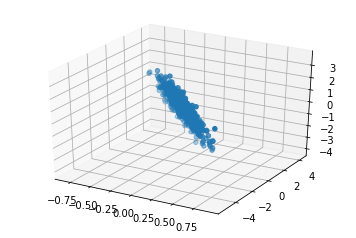

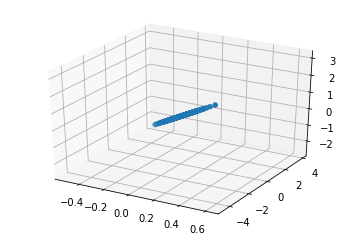

In [263]:
# Scatter Plots
# original data samples

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
x1data = X[0,:]
y1data = X[1,:]
z1data = X[2,:]
ax1.scatter(x1data,y1data,z1data)

# reconstructed data samples
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
x2data = X_reconstructed_ii[0,:]
y2data = X_reconstructed_ii[1,:]
z2data = X_reconstructed_ii[2,:]
ax2.scatter(x2data,y2data,z2data)



# Generation of Dataset #2

In [264]:
mu,sigma = 0,1.73
c = np.random.normal(mu, sigma, (3,1))


X2old = np.empty([1])
X2old = np.matmul(A,np.random.normal(mu_v,sigma_v,(2,1))) + c
print(X2)
print("\n")

#generation of v data set method 1
for i in range(2,501):
    v_2 = np.random.normal(mu_v,sigma_v,(2,1))
    x = np.matmul(A,v_2) + c
    X2old = np.append(X2old,x,axis = 1)
    
#generation of v dataset method 2
v2new = np.random.normal(0,1,(2,500))
X2 = np.matmul(A,v2new) + c

print("X = :")
print(X2)
print("\n")
print("Dimensionality of X is: ")
print(X2.shape)
print("\n")
print("Rank of X is: ",np.linalg.matrix_rank(X2))


[[ 1.50574098  1.23090329  1.48394961 ...  0.21971938  0.46306416
  -0.06183423]
 [ 0.71586037  1.07723082  0.87792173 ...  0.04461261  0.56318832
   1.17773498]
 [ 1.79195152  1.37398406  1.63702935 ...  1.99250558  1.5971206
   0.86789221]]


X = :
[[ 2.67295106  2.81166113  2.31532915 ...  2.30431696  2.2010848
   2.35367828]
 [-1.16085453 -1.51201522  2.03605202 ...  1.10316658  2.65207789
   2.52728511]
 [ 3.89988369  3.274946    1.04761156 ...  2.96860715  0.92577381
  -0.27109469]]


Dimensionality of X is: 
(3L, 500L)


('Rank of X is: ', 3)


## PCA, Centering, and Dataset #2

In [265]:
# Singular Value and Eigenvalue Decomposition of Dataset #1
# Singular Value Decomposition of X:

U2,D2,VT2 = np.linalg.svd(X2, full_matrices=True) 
print("The left singular matrix of the second dataset X is : ")
print(U2)
print("\n")

# Compute XX(transpose)
X_XT2 = np.matmul(X2,X2.transpose())


# w gives the eigen values, v gives the eigen vectors
eigen_values,eigen_vector = np.linalg.eig(X_XT2)
print("The eigen vector of X_XT is: ")
print(eigen_vector)
print("\n")

#D is the singular value matrix, w gives the eigenvalues 
print("The square of the singular value of X is :")
print(np.power(D2,2))
print("\n")

print("The eigen values of X_XT are : ")
print(eigen_values)
print("\n")


The left singular matrix of the second dataset X is : 
[[-0.78684707  0.01690176  0.61691654]
 [-0.35559664  0.80459023 -0.47558973]
 [-0.50440332 -0.59358983 -0.62707926]]


The eigen vector of X_XT is: 
[[ 0.78684707  0.61691654 -0.01690176]
 [ 0.35559664 -0.47558973 -0.80459023]
 [ 0.50440332 -0.62707926  0.59358983]]


The square of the singular value of X is :
[4745.32048235 1310.4411534   347.54027968]


The eigen values of X_XT are : 
[4745.32048235  347.54027968 1310.4411534 ]




In [266]:
# PCA Components
PCA_Components_2 = eigen_vector[:,[0,1]]
print("PCA Components for the second dataset")
print(PCA_Components_2)
print("\n")

# Feature vectors:
X_featured_2 = np.matmul(PCA_Components_2.transpose(),X2)

# Reconstructing the original data samples:
p1 = np.matmul(PCA_Components_2,PCA_Components_2.transpose())
X_reconstructed_2 = np.matmul(p1,X2)
print("The reconstructed data matrix for second dataset: ")
print(X_reconstructed_2)
print("\n")
print("The original second dataset is :")
print(X2)
print("\n")




PCA Components for the second dataset
[[ 0.78684707  0.61691654]
 [ 0.35559664 -0.47558973]
 [ 0.50440332 -0.62707926]]


The reconstructed data matrix for second dataset: 
[[2.72710034 2.8642764  2.29748987 ... 2.31843992 2.17367846 2.31591757]
 [1.41686426 0.99267844 1.18683187 ... 1.77547491 1.3474282  0.72972653]
 [1.99816079 1.4270977  1.6741273  ... 2.47260885 1.88828462 1.05506173]]


The original second dataset is :
[[ 2.67295106  2.81166113  2.31532915 ...  2.30431696  2.2010848
   2.35367828]
 [-1.16085453 -1.51201522  2.03605202 ...  1.10316658  2.65207789
   2.52728511]
 [ 3.89988369  3.274946    1.04761156 ...  2.96860715  0.92577381
  -0.27109469]]




In [267]:
# Frobenius Norm
frobenius_norm_2 = np.linalg.norm(X_reconstructed_2 - X2)
print("representational error = :", frobenius_norm_2**2)


('representational error = :', 1310.4411534017495)


### Mean centering data sample 2

In [268]:
# centering the data using mean vector

mean_vector = X2.mean(axis = 0)
approx_data = np.matmul(p1,X2-mean_vector) + mean_vector
print("The approximate adat after mean centering is: ")
print(approx_data)
print("\n")

print("The original dataset #2 is:")
print(X2)
print("\n")
# representation error for the approximate data
frobenius_norm_app = np.linalg.norm(approx_data - X2)
print("representational error for the approximate data sample  = :")
print(frobenius_norm_app**2)


The approximate adat after mean centering is: 
[[2.73404923 2.87015009 2.30442208 ... 2.3266267  2.18109851 2.32183656]
 [1.74765864 1.27228946 1.51683243 ... 2.16519825 1.70065192 1.01149377]
 [1.75411583 1.22081348 1.430668   ... 2.18508881 1.62769234 0.84718677]]


The original dataset #2 is:
[[ 2.67295106  2.81166113  2.31532915 ...  2.30431696  2.2010848
   2.35367828]
 [-1.16085453 -1.51201522  2.03605202 ...  1.10316658  2.65207789
   2.52728511]
 [ 3.89988369  3.274946    1.04761156 ...  2.96860715  0.92577381
  -0.27109469]]


representational error for the approximate data sample  = :
1340.2037455298573


# Generation of Dataset #3

In [269]:
mu_n,sigma_n = 0,0.1
mu_v3,sigma_v3 = 0,1

# generate v using method 1

X3old = np.empty([1])
nold = np.random.normal(mu_n, sigma_n, (3,1))
X3old = np.matmul(A,np.random.normal(mu_v,sigma_v,(2,1))) + n

for i in range(2,501):
    nold = np.random.normal(mu_n, sigma_n, (3,1))
    v_3 = np.random.normal(mu_v3,sigma_v3,(2,1))
    x = np.matmul(A,v_3) + nold
    X3old = np.append(X3old,x,axis = 1)
    
#generate v using method 2

X3 = np.matmul(A,np.random.normal(0,1,(2,500))) + np.random.normal(mu_n, sigma_n, (3,500))
print("X = :")
print(X3)
print("\n")

print("Dimensionality of X is: ")
print(X3.shape)
print("\n")
print("Rank of X is: ")
print(np.linalg.matrix_rank(X3))


X = :
[[-0.13482113  0.30958575 -0.47612096 ...  0.60026824  0.28723731
  -0.29158795]
 [-0.28010483 -2.11280466  1.74594364 ... -3.44907464 -1.37365469
   0.59746087]
 [ 0.54417582  3.51447986 -0.03052767 ...  1.65193864 -0.31824484
  -0.07527077]]


Dimensionality of X is: 
(3L, 500L)


Rank of X is: 
3


In [270]:
# transforming data samples into normalized variants

normalized_data = np.linalg.norm(X3,ord=2)
normalized_data = X3/normalized_data

print("Normalized data is: ")
print(normalized_data)
print("\n")

#rank
print("The rank of the normalized data matrix is: ")
print((np.linalg.matrix_rank(normalized_data)))

#singular values
U_norm,D_norm,VT_norm = np.linalg.svd(normalized_data, full_matrices=True)
print("The singular values of normalized data is: ")
print(D_norm)

Normalized data is: 
[[-0.00355533  0.00816399 -0.01255564 ...  0.01582949  0.00757465
  -0.00768938]
 [-0.00738656 -0.05571612  0.04604174 ... -0.09095448 -0.03622422
   0.01575546]
 [ 0.01435029  0.09267926 -0.00080504 ...  0.04356276 -0.00839234
  -0.00198494]]


The rank of the normalized data matrix is: 
3
The singular values of normalized data is: 
[1.         0.5775047  0.06198499]


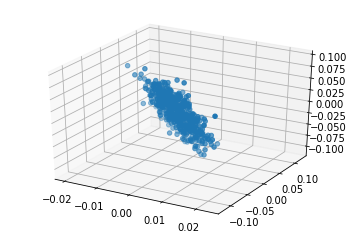

In [271]:
# Scatter plot for the normalized data samples

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
xnorm = normalized_data[0,:]
ynorm = normalized_data[1,:]
znorm = normalized_data[2,:]
ax3.scatter(xnorm,ynorm,znorm)





The eigen vector of normalized data is: 
[[ 0.07963982 -0.97515651 -0.20670577]
 [-0.73665142 -0.19727729  0.64685884]
 [ 0.67156697 -0.10075438  0.73406155]]


The eigen values of normalized data are : 
[1.         0.00384214 0.33351168]


PCA Components for the normalized dataset
[[-0.97515651 -0.20670577]
 [-0.19727729  0.64685884]
 [-0.10075438  0.73406155]]




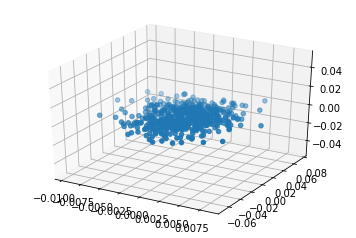

In [272]:
# Compute XX(transpose)
X_XT_norm = np.matmul(normalized_data,normalized_data.transpose())


# w gives the eigen values, v gives the eigen vectors
wnorm,vnorm = np.linalg.eig(X_XT_norm)
print("The eigen vector of normalized data is: ")
print(vnorm)
print("\n")

#D is the singular value matrix, w gives the eigenvalues 

print("The eigen values of normalized data are : ")
print(wnorm)
print("\n")

#Denoising the data samples
# PCA Components
PCA_Components_norm = vnorm[:,[1,2]]
print("PCA Components for the normalized dataset")
print(PCA_Components_norm)
print("\n")

# Feature vectors:
X_denoised = np.matmul(PCA_Components_norm.transpose(),normalized_data)

# Scatter plot for the denoised data samples

fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
xnorm_de = X_denoised[0,:]
ynorm_de = X_denoised[1,:]
#znorm_de = X_denoised[2,:]
ax4.scatter(xnorm_de,ynorm_de)


# Real Data

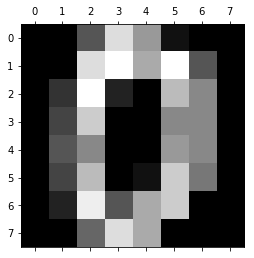

In [273]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
images, labels = load_digits(1, return_X_y=True)
#images_transpose = images.transpose()
digits = load_digits()

plt.gray()
plt.matshow(digits.images[0])
plt.show()





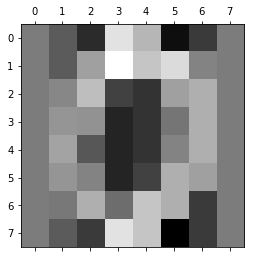

In [274]:
# center data
mean_images = np.mean(digits.images[0],axis=0)
images_T = digits.images[0] - mean_images
plt.gray()
plt.matshow(images_T)
plt.show()



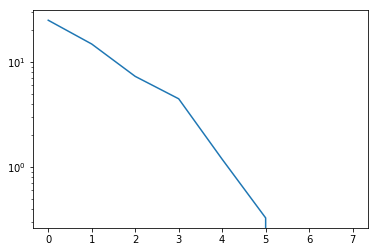

In [213]:
#Plotting singular values on the log scale

U_im,S_im,V_im = np.linalg.svd(images_T)
plt.plot(S_im)
plt.yscale("log")

In [275]:
print("Dimensionality of the images matrix is: ")
print(images_T.shape)
print("\n")
fro_images = np.sum(np.square(images_T))
fro_images = fro_images*0.90
singular_sum = 0

k=0
while singular_sum < fro_images:
    singular_sum = singular_sum + (S_im.item(k,))**2 
    #print(singular_sum)
    k = k+1
print(k)
print("\n")
print("We get k = 3 as the smallest integer")
    

Dimensionality of the images matrix is: 
(8L, 8L)


2


We get k = 3 as the smallest integer


The eigen vector of the images matrix is: 
[[ 0.49458437  0.32597549  0.06389757  0.06159378 -0.50328903 -0.11469596
  -0.583387    0.39657178]
 [ 0.23458355 -0.70985019  0.51389644  0.13763789  0.16253077  0.04003113
  -0.32484167 -0.01891346]
 [-0.33304434 -0.08438485  0.14614615 -0.63781712 -0.37986499 -0.33759122
  -0.12198302 -0.34490958]
 [-0.32610614  0.21145454  0.03371775 -0.32791541  0.48877507  0.30416477
  -0.60327511  0.42853219]
 [-0.31159183  0.29658907  0.14599359  0.55129108  0.23166435 -0.54597375
  -0.21346829 -0.19789172]
 [-0.33686564  0.01834151 -0.04907446  0.35133472 -0.40602626  0.6476238
  -0.14584874 -0.30655709]
 [ 0.05984178 -0.38121906 -0.82757503  0.04661071  0.0688359  -0.171756
  -0.32384726 -0.02051148]
 [ 0.51859825  0.32309349 -0.02700202 -0.18273566  0.33737419  0.17819723
   0.05999312 -0.63734727]]


The eigen values of the images matrix are : 
[ 6.24510918e+02  2.20181562e+02  5.33295115e+01  1.99601036e+01
  1.41017543e+00  1.07729116e-01 -9.113

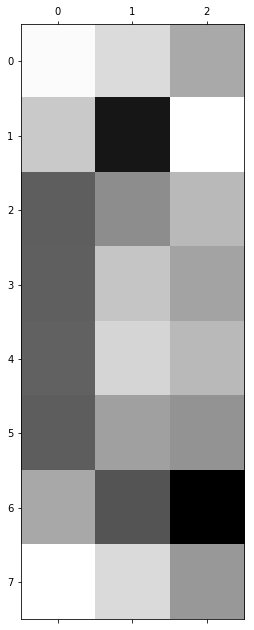

In [276]:

X_XT_im = np.matmul(images_T,images_T.transpose())


# w gives the eigen values, v gives the eigen vectors
wim,vim = np.linalg.eig(X_XT_im)
print("The eigen vector of the images matrix is: ")
print(vim)
print("\n")

print("The eigen values of the images matrix are : ")
print(wim)

print("The indices of the maximum eigen values")
top = (-wim).argsort()[:3]
print((-wim).argsort()[:3])
print("\n")

print("The top 3 PCA Components")
PCA = vim[:,top]
print(PCA)

# PCA image

plt.gray()
plt.matshow(PCA)
plt.show()



In [277]:
# Feature vector for images
PCAT = PCA.transpose()
im_feat = np.matmul(PCAT,images_T)
print("The feature vector is: ")
print(im_feat.shape)

The feature vector is: 
(3L, 8L)


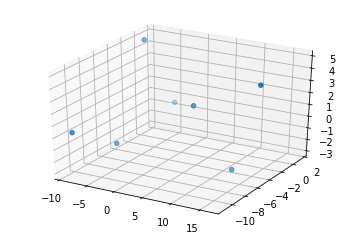

In [278]:
# Scatter plot for the featured images data samples

fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')
xnorm_im = im_feat[0,:]
ynorm_im = im_feat[1,:]
znorm_im = im_feat[2,:]
ax5.scatter3D(xnorm_im,ynorm_im,znorm_im)

In [279]:
# Reconstructing the original vectors

im_recon = np.matmul(PCA,im_feat)

# representation error
rep_error_im = np.square(np.linalg.norm(im_recon-images_T))
print(rep_error_im)

21.478008173160912


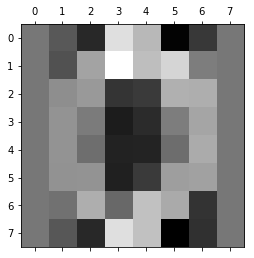

In [280]:
# Reconstructing the image back.
plt.gray()
plt.matshow(im_recon)
plt.show()
